*DSCI PROJECT PROPOSAL*

**Heart Disease Diagnosis** 

There are many health and lifestyle-related factors such as age, electrocardiogram results, chest pain, and many more that influence the outcomes of a heart disease prognosis. Heart disease is a leading cause of death within North America, largely affecting the elderly with cardiovascular problems- such as chest pain or high blood pressure. In our heart disease dataset, data has been sourced from mostly older male patients, measuring various health variables and their corresponding heart disease diagnosis, ranging from none to high chances of heart disease, on a scale from 0 to 4. In this project, we seek to predict whether a male patient is at risk of heart disease based on their age, type of chest pain, and resting electrocardiogram results. We believe that there will be a positive correlation between an older age, category 4 chest pain (worse pain = a higher number, from 1-4), category 1 ECG abnormality (abnormal results = larger number, from 0-2) and worse heart disease diagnosis. These relationships are shown in tables/visualizations below, in  exploratory data analysis. We hypothesize that the impacts of these aforementioned trends will be shown when analyzing the health data of new patients. 

We will test this thesis by splitting our dataset into a testing and training set, creating a KNN classifier with an optimized K-parameter through cross-validation and accuracy analysis on the test data. This KNN classifier will then be run on a test dataset that we create of a male patient with higher age, abnormal ECG results, and severe chest pain. The classifier will present us with a diagnosis of heart disease severity. In analyzing our thesis, we hope to gain more insight into its accuracy and to solidify the correlation between our predictor variables and heart disease prognoses for future patients.

One way that we will visualize the results of our analysis is through bar graphs and scatter plots. As we have aready done in this proposal, we use these visualizations to show the relationship between each of our predictor variables and heart disease. By using a separate visualization for each predictor variable, we find a relationship between the predictor and unknown (heart disease severity), which we use to formulate our thesis. This allows us to classify and predict new observations, using trends that we will be able to observe from the graphs.

The findings of our results will allow us to predict the severity of heart disease through correlations with health variables, helping physicians make future diagnoses on older patients by considering specific health markers, as well as highlighting how these markers impact cardiovascular health. This may also aid future research on preventative measures against heart disease. We expect to find that poorer cardiovascular health conditions, such as worse chest pain, will lead to higher chances of heart disease in accordance to our thesis. In the future, we can research how to further reduce heart disease by developing treatments for the predictor variables which our analysis proves is linked to poorer prognoses. 

In [3]:
library(tidyverse)
library(tidymodels)

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/bak" 
heart_dataset = read_csv(url, col_names = FALSE) %>% 
    rename("age" = X1,
           "sex" = X2,
           "chest_pain" = X3,
           "ecg" = X7,
           "heart_disease_severity" = X14
    ) %>% 
    select(age, sex, chest_pain, ecg, heart_disease_severity)

heart_disease_split = initial_split(heart_dataset, prop = 0.75, strata = heart_disease_severity)
heart_disease_train = training(heart_disease_split) 
heart_disease_test = testing(heart_disease_split) 

heart_disease_train 
# training data will be 75% of the original dataset 
heart_disease_test 
# testing data will be 25% of the original dataset

# this dataset is already cleaned, no need for tidying: each row is an observation and each column is a variable. 
    # there are also no missing columns
# we choose to look at these four predictor variables, analyzing their relationship to heart disease severity - done below. 

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_double(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



age,sex,chest_pain,ecg,heart_disease_severity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,1,4,1,0
60,1,4,1,2
66,1,3,2,0
66,1,3,1,0
65,1,4,1,3
60,1,3,1,0
60,1,3,0,3
60,1,2,1,1
59,1,4,1,1


age,sex,chest_pain,ecg,heart_disease_severity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,4,1,2
55,1,4,1,1
56,1,2,1,0
62,1,4,0,1
62,1,4,1,0
63,1,4,0,4
46,1,4,0,1
51,1,4,1,2
60,1,4,1,1


`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,heart_disease_severity,n
<dbl>,<dbl>,<int>
0,0,2
0,1,3
1,0,37
1,1,39
1,2,31
1,3,32
1,4,8


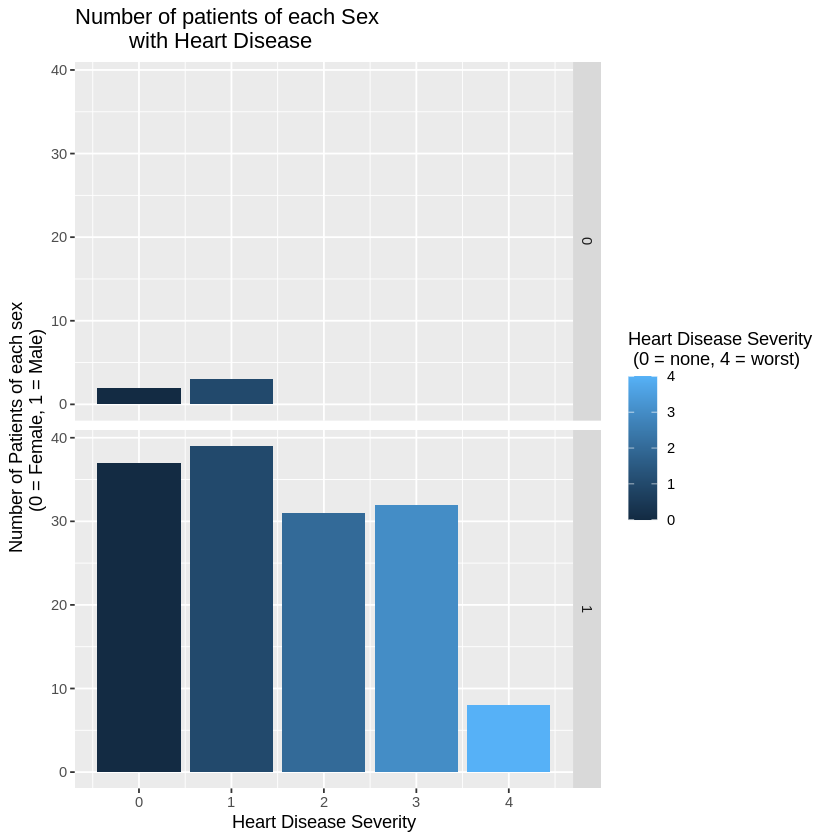

In [8]:
sex_tbl = heart_disease_train %>% 
    group_by(sex, heart_disease_severity) %>% 
    summarize (n = n()) 
sex_tbl  
# this table summarizes the distrbution of patients of a certain sex (0 = female, 1 = male) 
    # and how many of each fall into a heart disease category.

plot_sex = sex_tbl%>% 
    ggplot(aes(x = heart_disease_severity, y = n, fill = heart_disease_severity)) + 
        geom_bar(stat = "identity") + 
        facet_grid(sex ~ .) + 
        labs(x = "Heart Disease Severity", y = "Number of Patients of each sex \n  (0 = Female, 1 = Male)", fill = "Heart Disease Severity \n (0 = none, 4 = worst)") + 
        ggtitle ("Number of patients of each Sex \n         with Heart Disease") 
plot_sex
# this visualization proves that the majority of our patients are males, giving us a larger sample size. 
    # thus it would be fitting that our data analysis is is centered around male patients.

`summarise()` regrouping output by 'chest_pain' (override with `.groups` argument)



chest_pain,heart_disease_severity,n
<dbl>,<dbl>,<int>
1,0,2
1,1,1
1,2,1
1,3,2
2,0,7
2,1,4
2,2,1
3,0,13
3,1,7


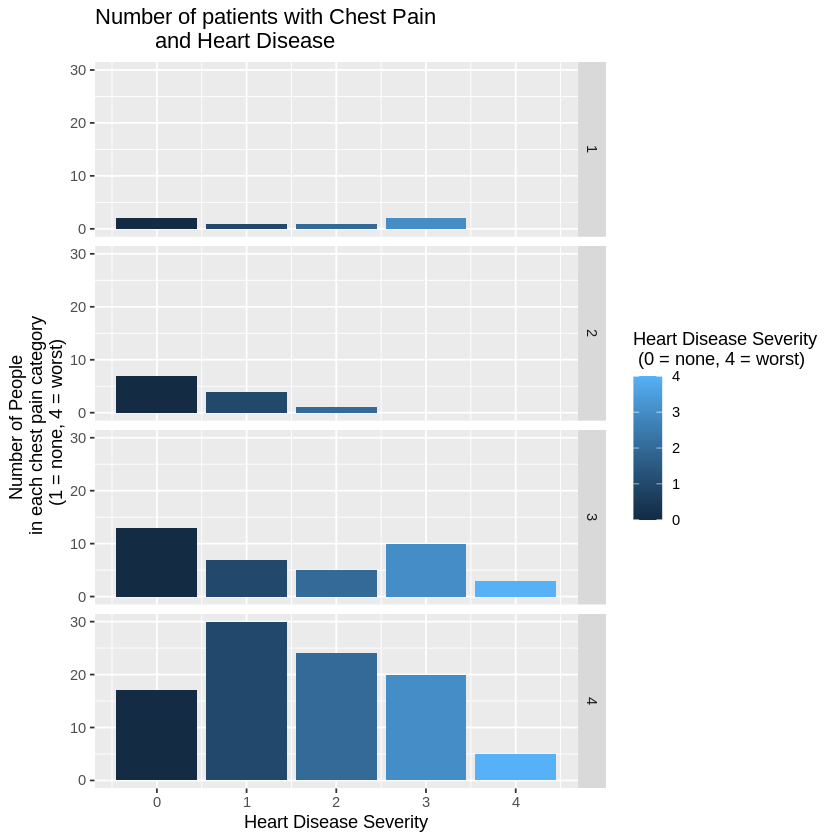

In [6]:
chest_pain_tbl = heart_disease_train %>% 
    group_by(chest_pain, heart_disease_severity) %>% 
    summarize (n = n()) 
chest_pain_tbl  
# this table summarizes the number of patients with severe chest pain (1 being the worst) 
    # and how many patients fall into each type of heart disease diagnosis in each category of chest pain

plot_chest_pain = chest_pain_tbl %>% 
    ggplot(aes(x = heart_disease_severity, y = n, fill = heart_disease_severity)) + 
        geom_bar(stat = "identity") + 
        facet_grid(chest_pain ~ .) + 
        labs (x = "Heart Disease Severity", y = "Number of People \n in each chest pain category \n (1 = none, 4 = worst)", fill = "Heart Disease Severity\n (0 = none, 4 = worst)") + 
        ggtitle ("Number of patients with Chest Pain \n          and Heart Disease ")
plot_chest_pain
# this visualization shows that patients with worse chest pain (bar plot #4) are more likely to have category 1-3 heart disease
    # this is in comparison to patients with none to milder chest pain (bar plots #1 to #3), who have less occurences of category 1-3 heart disease

`summarise()` regrouping output by 'ecg' (override with `.groups` argument)



ecg,heart_disease_severity,n
<dbl>,<dbl>,<int>
0,0,14
0,1,16
0,2,12
0,3,14
0,4,2
1,0,20
1,1,17
1,2,18
1,3,15


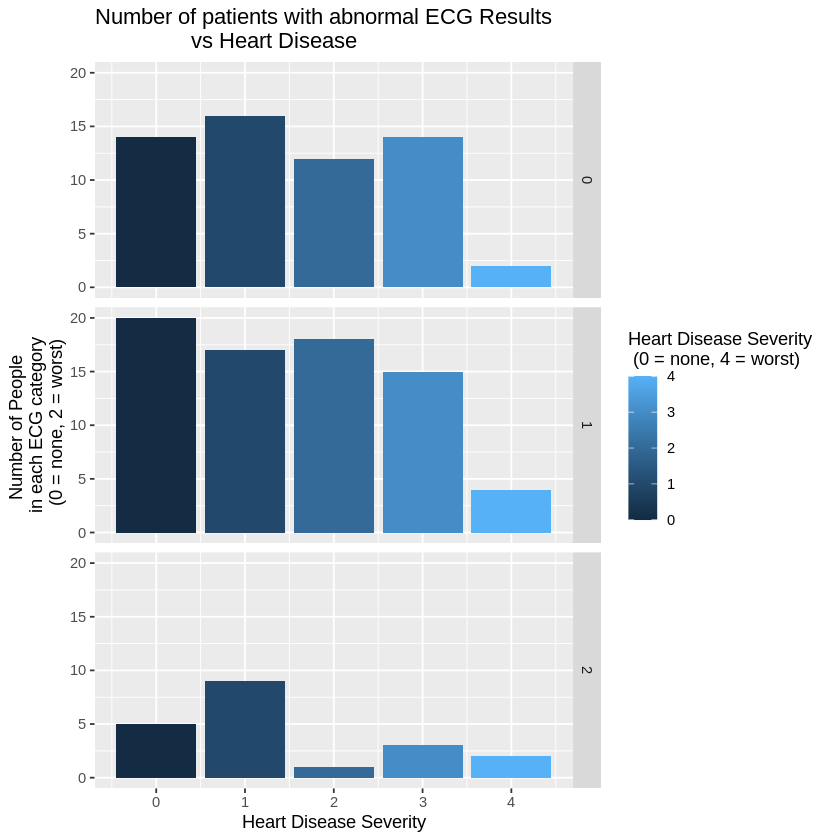

In [7]:
ecg_tbl = heart_disease_train %>% 
    group_by(ecg, heart_disease_severity) %>% 
    summarize (n = n()) 
ecg_tbl 
# this table summarizes the number of patients with abnormal ECG results (2 being the worst)
    # and how many patients fall into each type of heart disease diagnosis within each category of ECG abnormality

plot_ecg = ecg_tbl %>% 
    ggplot(aes(x = heart_disease_severity, y = n, fill = heart_disease_severity)) + 
        geom_bar(stat = "identity") + 
        facet_grid(ecg ~ .) + 
        labs (x = "Heart Disease Severity", y = "Number of People \n in each ECG category \n (0 = none, 2 = worst)", fill = "Heart Disease Severity \n (0 = none, 4 = worst)") + 
        ggtitle ("Number of patients with abnormal ECG Results \n                vs Heart Disease ")
plot_ecg
# This shows there isn't a strong correlation between abnormal ECG results and heart disease
# however, we see that patients with ST-T wave abnormality (bar plot #1) have a higher chance of category 2 and 3 heart disease (more severe), 
    # compared to patients with no ECG abnormality (bar plot #0) who have higher chance of category 1 heart disease (less severe)
# therefore, we see a positive correlation between ECG abnormality and more severe heart disease